<a href="https://colab.research.google.com/github/jlgrons/JSC270_Lecture6/blob/main/JSC270_Lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coin Flip Simulation

In [ ]:
from scipy.stats import binom
# import numpy as np - note you could've also used numpy!

def heads_counter(heads_prob, n_flips):

  heads_count = binom.rvs(n=n_flips, p=heads_prob, size=1)
  # heads_count = np.random.binomial(n=n_flips,p=heads_prob)

  return heads_count[0]

In [ ]:
# Set the seed of the random number generator so you can replicate results
import numpy as np
np.random.seed(2022)

my_heads_prob = 0.45
my_n_flips = 5
my_n_trials = 10000
my_result = [heads_counter(my_heads_prob, my_n_flips) for n in range(1,my_n_trials)]

In [ ]:
print('Expected number of heads in the 5 trials is', my_heads_prob*my_n_flips)
print('Average number of heads in the 10000 simulations is', sum(my_result)/len(my_result))

Expected number of heads in the 5 trials is 2.25
Average number of heads in the 10000 simulations is 2.242024202420242


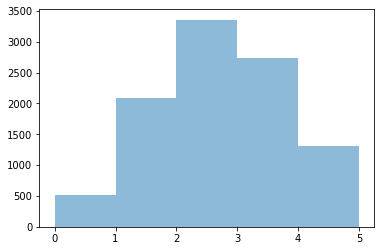

In [ ]:
import matplotlib.pyplot as plt
plt.hist(my_result, alpha=0.5, bins = 5)
plt.show()

# Penguin Regression Simulation

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import numpy as np
import matplotlib.pyplot as plt
sns.set()
sns.set_style('whitegrid')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
penguins = sns.load_dataset("penguins")

In [ ]:
adelie = penguins[penguins.species == 'Adelie'].dropna(how = 'any')

In [ ]:
adelie.shape

(146, 7)

In [ ]:
adelie.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


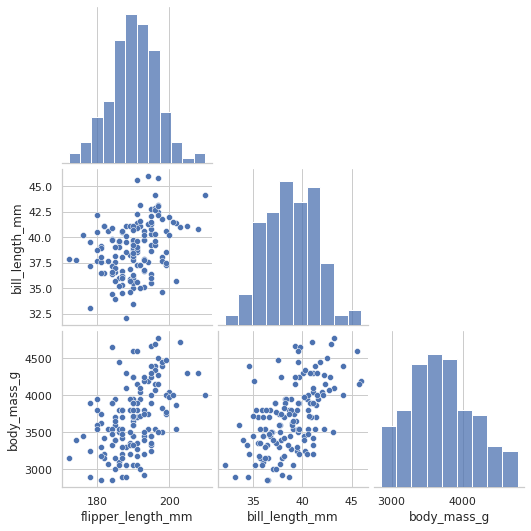

In [ ]:
sns.pairplot(adelie[['flipper_length_mm', 'bill_length_mm', 'body_mass_g']], corner = True)
plt.show()

In [ ]:
from scipy.stats import norm
mu_flipper, std_flipper = norm.fit(adelie.flipper_length_mm)
mu_bill, std_bill = norm.fit(adelie.bill_length_mm)

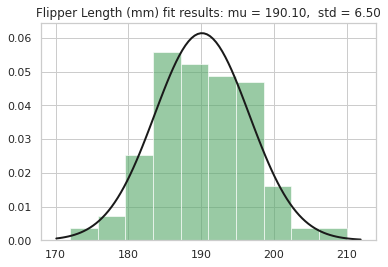

In [ ]:
temp_data = adelie.flipper_length_mm

# Plot the histogram.
plt.hist(temp_data, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_flipper, std_flipper)
plt.plot(x, p, 'k', linewidth=2)
title = "Flipper Length (mm) fit results: mu = %.2f,  std = %.2f" % (mu_flipper, std_flipper)
plt.title(title)

plt.show()

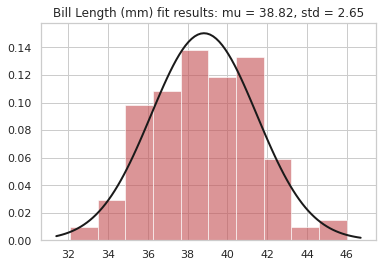

In [ ]:
temp_data = adelie.bill_length_mm

# Note: I ended up using this plot multiple times so I should have written a function! 
# Copy and pasting is not good practice! You should write functions for repeated code in your assignments. 

# Plot the histogram.
plt.hist(temp_data, bins = 10, density=True, alpha=0.6, color='r')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_bill, std_bill)
plt.plot(x, p, 'k', linewidth=2)
title = "Bill Length (mm) fit results: mu = %.2f, std = %.2f" % (mu_bill, std_bill)
plt.title(title)

plt.show()

In [ ]:
reg1 = smf.ols('body_mass_g ~ bill_length_mm + flipper_length_mm', data = adelie).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     45.12
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           6.43e-16
Time:                        19:07:42   Log-Likelihood:                -1065.7
No. Observations:                 146   AIC:                             2137.
Df Residuals:                     143   BIC:                             2146.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -3491.9951    889.59

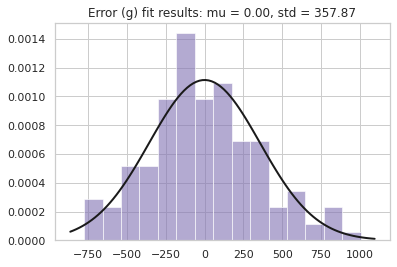

In [ ]:
predictions_1 = reg1.predict(adelie[['bill_length_mm', 'flipper_length_mm']])
resids_1 = adelie.body_mass_g - predictions_1

mu_resids, std_resids = norm.fit(resids_1)

# Plot the histogram.
plt.hist(resids_1, bins = 15, density=True, alpha=0.6, color='m')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_resids, std_resids)
plt.plot(x, p, 'k', linewidth=2)
title = "Error (g) fit results: mu = %.2f, std = %.2f" % (mu_resids, std_resids)
plt.title(title)

plt.show()


In [ ]:
# Residual variance 
np.sqrt(((adelie.body_mass_g - predictions_1)**2).mean()*adelie.shape[0]/(adelie.shape[0]-2))

360.34571778135063

In [ ]:
# Lets generate a new pengun!
new_bill_length = np.random.normal(mu_bill, std_bill, 1)[0]
new_flipper_length = np.random.normal(mu_flipper, std_flipper, 1)[0]
new_error = np.random.normal(mu_resids, std_resids, 1)[0]

new_body_mass = -3492 + 75*new_bill_length + 22*new_flipper_length + new_error



print('The new penguin has a body mass (g) of', round(new_body_mass, 2), 
      'and a bill and flipper length (mm) of', round(new_bill_length, 2), 
      ' and ', round(new_flipper_length, 2))

The new penguin has a body mass (g) of 3870.22 and a bill and flipper length (mm) of 40.12  and  190.64


# Book prices

In [ ]:
# Parameters for paperback and hardcover book price distributions
mu_p = 9
sd_p = 1
mu_h = 20
sd_h = 2

In [ ]:
# Generate indicator of paperback or hardcover
book_type = np.random.binomial(1, 0.5) 
paperback_price = np.random.normal(mu_p, sd_p)
hardcover_price = np.random.normal(mu_h, sd_h)
book_price =  book_type*paperback_price + (1-book_type)*hardcover_price

In [ ]:
if book_type == 1:
  chosen_book = 'paperback'
else:
  chosen_book = 'hardcover'
print('The chosen book is', chosen_book, 'and the cost is', round(book_price, 2))

The chosen book is paperback and the cost is 9.22
